# Описание проекта

Необходимо выявить определяющие успешность игры закономерности на основе исторических данных об играх. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании

# Загрузка данных и изучение общей информации

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [ ]:
df=pd.read_csv('/datasets/games.csv')

In [ ]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Названия колонок следует привести к змеиному_формату

Значения в колонке Year_of_Release следует перевести в int

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Значения в колонке User_Score следует привести к формату float

In [ ]:
df.isna().sum().sort_values(ascending = False)

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64

# Подготовка данных

## Приведение колонок к нижнему регистру

In [ ]:
df.columns = df.columns.str.lower()

## Обработка пропусков

### Name and Genre

In [ ]:
df['name'] = df['name'].fillna('-')
df['genre'] = df['genre'].fillna('-')

<div class="alert alert-block alert-info">
Переменные типа строка с незаданными значениями имени и жанра лучше всего заменить обозначением пропуска также строкового типа, например "-". Пропуски лучше заполнить чтобы была возможность использовать значения других колонок. Альтернативный вариант - удалить строки. Поскольку пропусков немного, то удаление или замена не окажет значительного влияния на выводы
</div>

### User Score

In [ ]:
df.isna().sum().sort_values(ascending = False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  0
platform              0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [ ]:
df['user_score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

наиболее частое значение tbd = to be declared (decided)

Это значение означает, что пока рейтинг не выставлен

Посмотрим распределение без этого значения

In [ ]:
user_score = df[df['user_score'] != 'tbd']['user_score']
user_score = user_score.astype(float)

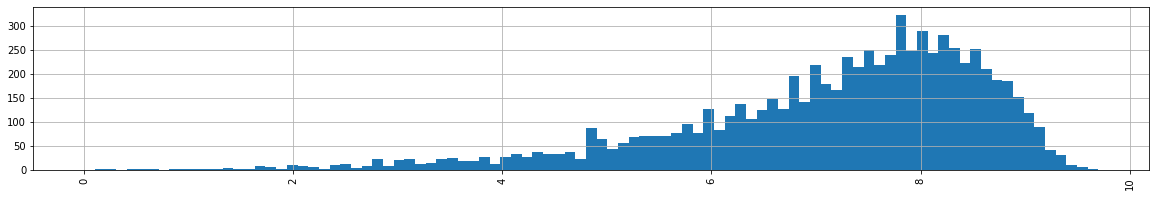

In [ ]:
plt.figure(figsize=(20,3));
plt.xticks(rotation='vertical')
user_score.hist(bins = 95);

Заменим tbd на nan, чтобы потом заменить все пропущенные случайными значениями из распределения

In [ ]:
def tbd_to_nan(cell):
    if cell == "tbd":
        return float("NaN")
    else:
        return cell

df['user_score'] = df['user_score'].apply(tbd_to_nan)

In [ ]:
# смена типа данных с object на float
df['user_score'] = df['user_score'].astype(float)

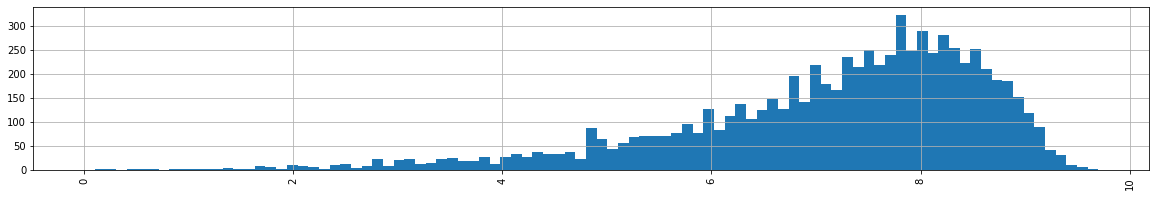

In [ ]:
plt.figure(figsize=(20,3));
plt.xticks(rotation='vertical')
df['user_score'].hist(bins = 95);

In [ ]:
user_score_table = df.sort_values(by = 'year_of_release').pivot_table(index = 'name', values = 'user_score', aggfunc = ['count', 'sum', lambda x : x.isna().sum()]).sort_values(by = ('count', 'user_score'), ascending = False)

user_score_table.columns.set_levels(['count','sum','nan_count'],level=0,inplace=True)
user_score_table[user_score_table[('nan_count','user_score')] > 0].sort_values(by = [('count', 'user_score'),('nan_count', 'user_score')], ascending = False)

/tmp/ipykernel_37/3817901470.py:3: FutureWarning: inplace is deprecated and will be removed in a future version.
  user_score_table.columns.set_levels(['count','sum','nan_count'],level=0,inplace=True)


,count,sum,nan_count
,user_score,user_score,user_score
name,,,
Need for Speed: Most Wanted,9,75.4,3.0
LEGO Marvel Super Heroes,8,56.1,1.0
FIFA 14,8,34.7,1.0
Madden NFL 08,7,46.1,1.0
Ratatouille,6,40.1,3.0
...,...,...,...
Karate,0,0.0,1.0
Karaoke Revolution Glee 2: Road to Regionals,0,0.0,1.0


In [ ]:
# для примера возьмём ЖАЖДУ СКОРОСТИ
df[df['name'] == 'Need for Speed: Most Wanted'][['user_score', 'year_of_release', 'platform']].sort_values(by = 'year_of_release')

,user_score,year_of_release,platform
253,9.1,2005.0,PS2
1591,8.5,2005.0,X360
1998,8.8,2005.0,XB
3581,9.1,2005.0,GC
5972,8.5,2005.0,PC
6410,6.1,2005.0,DS
6473,8.3,2005.0,GBA
523,NaN,2012.0,PS3
1190,8.5,2012.0,X360
2048,NaN,2012.0,PSV


Оценки разнятся для платформ, поэтому лучше не заполнять пропуски

### Rating

Восстановить пропуски в рейтинге можно по названиям игр, поскольку на некоторых платформах они указаны, а на некоторых нет. Возьмём информацию с тех где указаны

In [ ]:
rating_table = df.sort_values(by = 'year_of_release').pivot_table(index = 'name', values = 'rating', aggfunc = ['count', 'sum', lambda x : x.isna().sum()]).sort_values(by = ('count', 'rating'), ascending = False)

rating_table.columns.set_levels(['count','sum','nan_count'],level=0,inplace=True)
rating_table[rating_table[('nan_count','rating')] > 0].sort_values(by = ('count', 'rating'), ascending = False)

/tmp/ipykernel_37/2030946044.py:3: FutureWarning: inplace is deprecated and will be removed in a future version.
  rating_table.columns.set_levels(['count','sum','nan_count'],level=0,inplace=True)


,count,sum,nan_count
,rating,rating,rating
name,,,
Need for Speed: Most Wanted,9,NaN,3
Ratatouille,8,NaN,1
FIFA 14,8,NaN,1
LEGO Marvel Super Heroes,8,NaN,1
LEGO The Hobbit,7,NaN,1
...,...,...,...
Excitebike,0,0,1
Excitebike 64,0,0,1


In [ ]:
# для примера возьмём ЖАЖДУ СКОРОСТИ
df[df['name'] == 'Need for Speed: Most Wanted'][['rating', 'year_of_release']].sort_values(by = 'year_of_release')

,rating,year_of_release
253,T,2005.0
1591,T,2005.0
1998,T,2005.0
3581,T,2005.0
5972,T,2005.0
6410,E,2005.0
6473,E,2005.0
523,NaN,2012.0
1190,T,2012.0
2048,NaN,2012.0


In [ ]:
# найдём все пропуски rating
na_rating = df[df['rating'].isna() == True][['name', 'rating']] # данные с пропусками rating
na_rating['index1'] = na_rating.index # создаём индекс, по которому вернём заполненные пропуски в df

# сортируем данные по имени и году и создаём сводную таблицу с последними значениями рейтинга для игр
rating_restored = df.sort_values(by = ['name', 'year_of_release'], ascending = False).pivot_table(index='name', values='rating', aggfunc='first')

# выделяем ответы по рейтингу только для игр с имеющимися пропущенными значениями рейтинга
answers = rating_restored.query('name in @na_rating["name"]')

# объединяем ответы с данными с пропусками
merged = pd.merge(na_rating, answers, on = 'name', how='inner').drop(columns = 'rating_x').rename(columns = {'rating_y': 'rating'})

# объединяем с df
gross_merged = pd.merge(df, merged[['index1','rating']], left_index=True, right_on='index1', how = 'left').set_index('index1')

In [ ]:
df['rating'].isna().sum()

6766

In [ ]:
# заполняем пропуски
df['rating'] = gross_merged['rating_x'].fillna(gross_merged['rating_y'])

In [ ]:
df['rating'].isna().sum()

6329

количество пропусков сократилось, но не значительно

### Critic Score

In [ ]:
critic_score_table = df.sort_values(by = 'year_of_release').pivot_table(index = 'name', values = 'critic_score', aggfunc = ['count', 'sum', lambda x : x.isna().sum()]).sort_values(by = ('count', 'critic_score'), ascending = False)

critic_score_table.columns.set_levels(['count','sum','nan_count'],level=0,inplace=True)
critic_score_table[user_score_table[('nan_count','user_score')] > 0].sort_values(by = [('count', 'critic_score'),('nan_count', 'critic_score')], ascending = False)

/tmp/ipykernel_37/3546339396.py:3: FutureWarning: inplace is deprecated and will be removed in a future version.
  critic_score_table.columns.set_levels(['count','sum','nan_count'],level=0,inplace=True)
/tmp/ipykernel_37/3546339396.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  critic_score_table[user_score_table[('nan_count','user_score')] > 0].sort_values(by = [('count', 'critic_score'),('nan_count', 'critic_score')], ascending = False)


,count,sum,nan_count
,critic_score,critic_score,critic_score
name,,,
Need for Speed: Most Wanted,8,620.0,4.0
Madden NFL 08,8,617.0,0.0
Cars,8,516.0,0.0
Ratatouille,7,427.0,2.0
LEGO Harry Potter: Years 5-7,7,513.0,1.0
...,...,...,...
Ken to Mahou to Gakuen Mono. Final: Shinnyusei wa Ohimesama,0,0.0,1.0
Ken to Mahou to Gakuen Mono. 3D,0,0.0,1.0


In [ ]:
# для примера возьмём ЖАЖДУ СКОРОСТИ
df[df['name'] == 'Need for Speed: Most Wanted'][['critic_score', 'year_of_release', 'platform']].sort_values(by = 'year_of_release')

,critic_score,year_of_release,platform
253,82.0,2005.0,PS2
1591,83.0,2005.0,X360
1998,83.0,2005.0,XB
3581,80.0,2005.0,GC
5972,82.0,2005.0,PC
6410,45.0,2005.0,DS
6473,NaN,2005.0,GBA
523,NaN,2012.0,PS3
1190,83.0,2012.0,X360
2048,NaN,2012.0,PSV


Оценки разнятся для платформ, поэтому лучше не заполнять пропуски

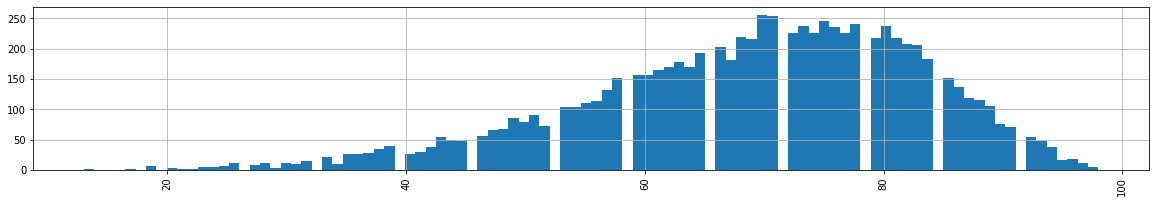

In [ ]:
plt.figure(figsize=(20,3));
plt.xticks(rotation='vertical')
df['critic_score'].hist(bins = 98);

Вывод: оценки пользователей и критиков имеют значительное количество пропусков, лучше их не заполнять, чтобы не делать неверных выводов при анализе. Пропуски рейтинга частично удалось востановить по названиям игр

Вероятно, наличие пропусков связано с тем, что оценки для разных платформ ещё не были проставлены (наиболее свежие платформы не имеют оценок) или выборка недостаточна (платформа не популярна)

# Исследовательский анализ данных

## Игры по годам

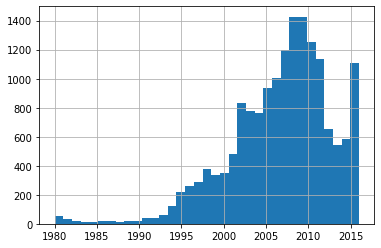

In [ ]:
df['year_of_release'].hist(bins = 35);

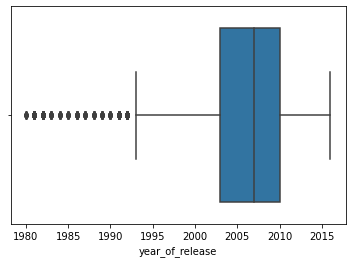

In [ ]:
ax = sns.boxplot(x=df['year_of_release'])

Для анализа важны данные начиная с 1993 года

In [ ]:
df = df[df['year_of_release'] >= 1993]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16141 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16141 non-null  object 
 1   platform         16141 non-null  object 
 2   year_of_release  16141 non-null  float64
 3   genre            16141 non-null  object 
 4   na_sales         16141 non-null  float64
 5   eu_sales         16141 non-null  float64
 6   jp_sales         16141 non-null  float64
 7   other_sales      16141 non-null  float64
 8   critic_score     7980 non-null   float64
 9   user_score       7460 non-null   float64
 10  rating           10171 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Пропусков стало значительно меньше

## Продажи по платформам

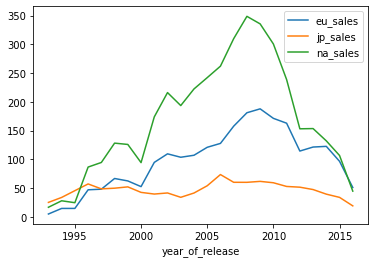

In [ ]:
df.pivot_table(index = 'year_of_release', values = ('na_sales', 'eu_sales', 'jp_sales'), aggfunc= 'sum').plot();

In [ ]:
df['platform']

0         Wii
2         Wii
3         Wii
4          GB
6          DS
         ... 
16710     PS3
16711    X360
16712     PSV
16713     GBA
16714     PSV
Name: platform, Length: 16141, dtype: object

In [ ]:
warnings.filterwarnings("ignore", category=DeprecationWarning) # не работает

pd.options.mode.chained_assignment = None

In [ ]:
df['sales'] = df['eu_sales'] + df['jp_sales'] + df['na_sales'] + df['other_sales']

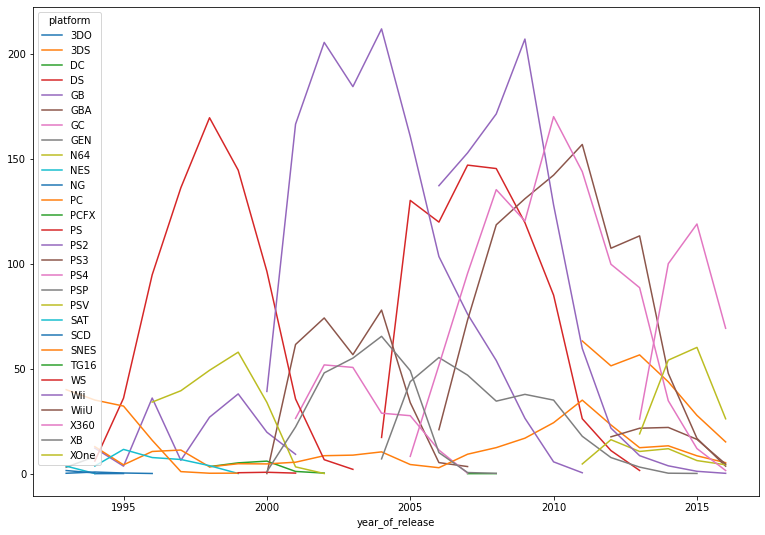

In [ ]:
df.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sales', aggfunc = 'sum').plot(figsize=(13,9));

In [ ]:
sales_per_platform = df.pivot_table(index = 'platform', values = 'sales', aggfunc = 'sum').sort_values(by = 'sales', ascending = False)

In [ ]:
platforms_filtered = sales_per_platform.query('sales > 300').reset_index()['platform']

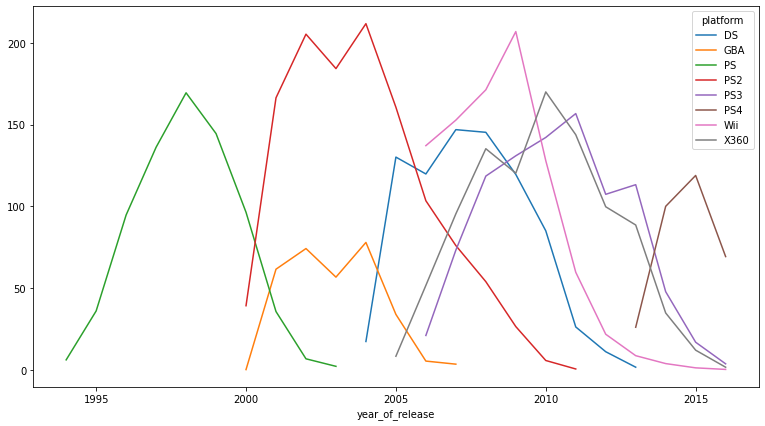

In [ ]:
df.query('platform in @platforms_filtered.tolist()').pivot_table(index = 'year_of_release', columns = 'platform', values = 'sales', aggfunc = 'sum').plot(figsize = (13,7));

примерно каждые 5 лет лидер среди платформ сменяется. Однако с 2007 по 2012 годы конкуренция значительно усилилась и лидеры сменялись примерно каждые 2-3 года. Для прогноза на 2017 г имеет смысл брать данные начиная с 2014 г

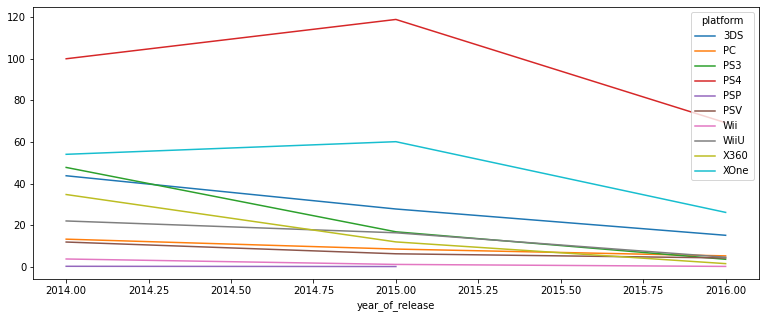

In [ ]:
df_newest = df.query('year_of_release >= 2014')
df_newest.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sales', aggfunc = 'sum').plot(figsize = (13, 5));

In [ ]:
df_newest.pivot_table(index = 'platform', values = 'sales', aggfunc = 'sum').sort_values(by = 'sales', ascending = False)

,sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


PS4 и XOne лидируют в период с 2014 по 2016 гг. У этих платформ пик продаж был в 2015 г. и в 2016 продажи пошли на спад. Остальные платформы прошли пик продаж задолго до актуального периода и продолжают падать.

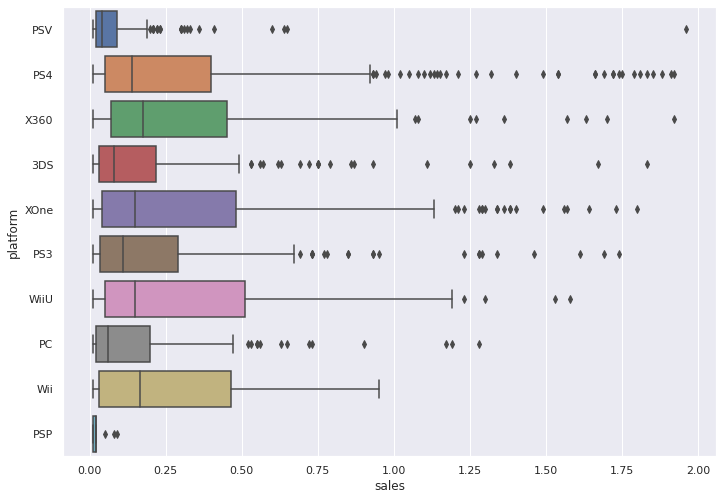

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(y=df_newest.query('sales < 2')['platform'], x = df['sales']);

У всех платформ распределение скошено вправо. Самый длинный хвост достоверных значений продаж имеет платформа PS4. Медианное значение не превышает 0.25 млн и максимально у платформы X360

## Зависимость продаж от отзывов

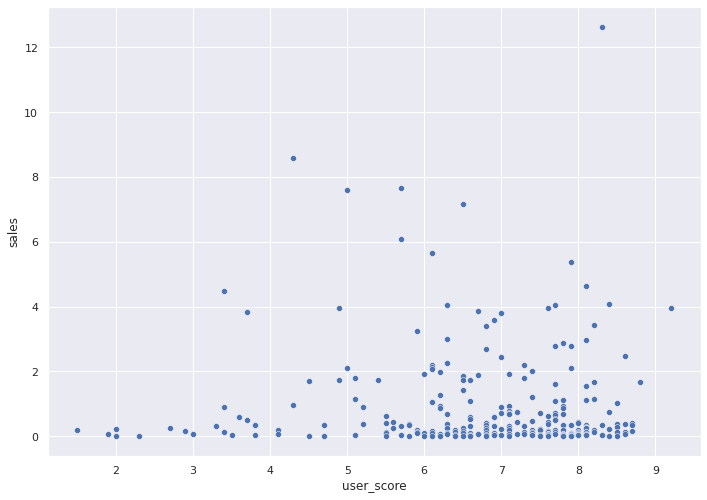

In [ ]:
sns.scatterplot(data=df[df['platform'] == "PS4"], x="user_score", y="sales");

In [ ]:
print(df[df['platform'] == "PS4"]['sales'].corr(df[df['platform'] == "PS4"]['user_score']))

-0.031957110204556376


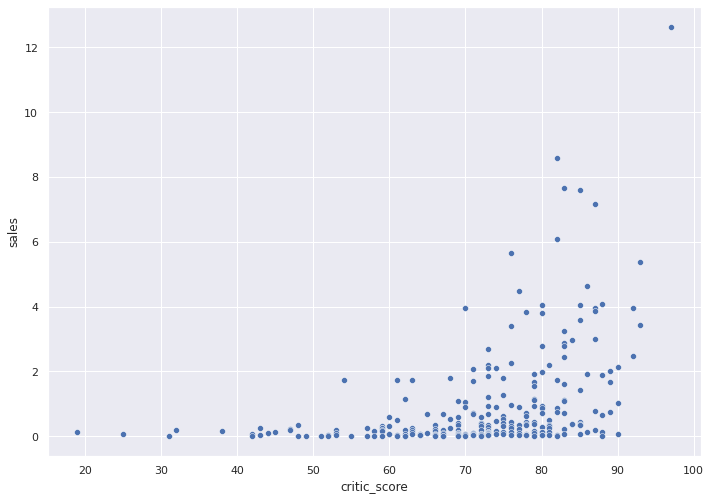

In [ ]:
sns.scatterplot(data=df[df['platform'] == "PS4"], x="critic_score", y="sales");

In [ ]:
print(df[df['platform'] == "PS4"]['sales'].corr(df[df['platform'] == "PS4"]['critic_score']))

0.406567902061781


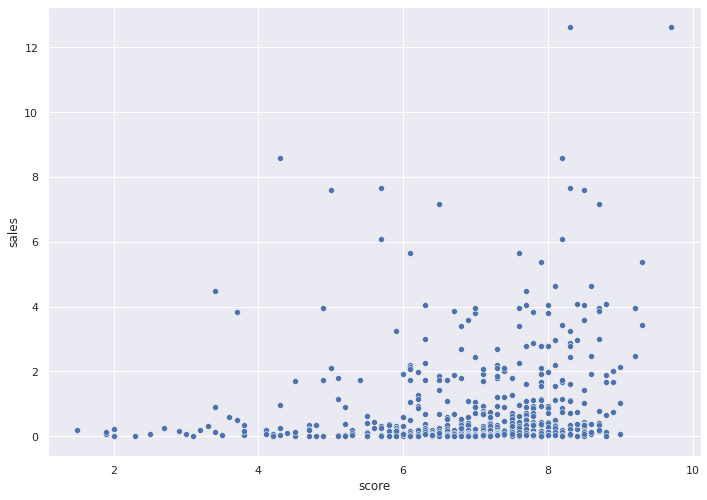

In [ ]:
#объединение оценок пользователей и критиков
sales_vs_user_score = df[['platform', 'sales', 'user_score']]
sales_vs_critic_score = df[['platform', 'sales', 'critic_score']]

sales_vs_critic_score['critic_score'] = sales_vs_critic_score['critic_score']/10 # нормализация

sales_vs_user_score = sales_vs_user_score.rename(columns = {'user_score':'score'})
sales_vs_critic_score = sales_vs_critic_score.rename(columns = {'critic_score':'score'})

frames = [sales_vs_user_score, sales_vs_critic_score]

sales_vs_score = pd.concat(frames)

sns.scatterplot(data=sales_vs_score.query('platform == "PS4"'), x="score", y="sales");

In [ ]:
print(sales_vs_score.query('platform == "PS4"')['sales'].corr(sales_vs_score.query('platform == "PS4"')['score']))

0.16679436274987083


коэффициент корреляции очень низкий, т.е. зависимости продаж от отзывов нет

In [ ]:
platforms_list = sales_vs_score['platform'].unique()
corr_dict = {"platform":[], "corr":[]}
i = 0
for i in range(len(platforms_list)):
  corr_dict["platform"].append(platforms_list[i])
  corr_dict["corr"].append(round(sales_vs_score.query('platform == @platforms_list[@i]')['sales'].corr(sales_vs_score.query('platform == @platforms_list[@i]')['score']),2))
  i+=1

pd.DataFrame.from_dict(corr_dict).sort_values(by = "corr", ascending = False)


,platform,corr
10,PS,0.38
16,WiiU,0.38
12,XB,0.29
5,PS2,0.28
8,3DS,0.28
17,GC,0.28
4,PS3,0.27
14,PSP,0.27
3,X360,0.25
6,GBA,0.20


выводы те же - корреляции продаж с отзывами нет

## Игры по жанрам

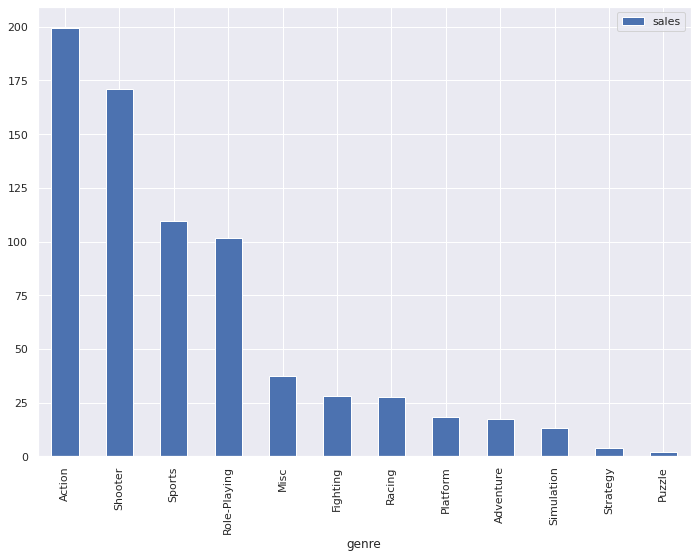

In [ ]:
df_newest.pivot_table(index = 'genre', values = 'sales', aggfunc = 'sum').sort_values(by = 'sales', ascending = False).plot(kind = 'bar');

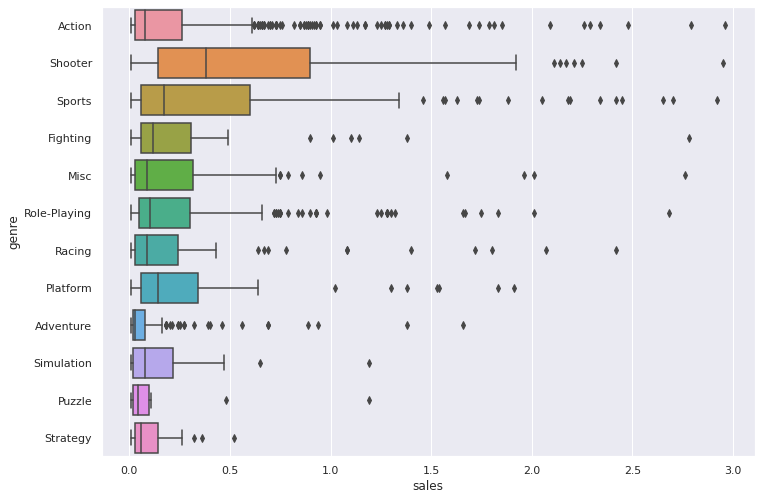

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(y=df_newest.query('sales < 3').sort_values(by = 'sales', ascending = False)['genre'], x = df['sales']);

Самые прибыльные жанры - action и shooter. Распределение продаж по жанру action узкое, а по shooter широкое;

медиана распределения продаж по жанру shooter сильно выше остальных жанров. Вероятно, прибыльность жанра shooter обеспечивается отдельными удачными играми.

Среди других прибыльных жанров можно выделить sports и role-paying, суммарные продажи которых немного недотягивают до 100 млн. копий в интервале 2014-2016 гг.

Медиана распределения продаж жанра sports на втором месте после shooter и распределение также широкое. Медиана жанра role-playing тоже достаточно высокая, но сравнимая с другими жанрами, например, action, simulation, misc, fighting, racing, platform. Ширина распределения жанра role-playing на третьем месте после shooter и sports.

Наименее прибыльными оказались жанры puzzle и strategy. Медиана распределения продаж по этим жанрам низкая, и распределения узкие.

Обобщая, следует заметить, что за рассматриваемый период 2014-2016 гг. жанрам shooter, sports и role-playing обеспечили высокие продажи единичные игры, проданные огромными тиражами, т.е., скорее всего, влияет фактор качества игр; жанру action высокие суммарные продажи обеспечины множеством различных игр, т.е. ощутимую роль играет количество игр.

Жанры с низкими продажами (менее 50 млн. копий за период 2014-2016 гг.), misc, fighting, racing, platform, adventure, simulation, strategy и puzzle, делятся также на две категории - с низкой медианой и узким распределением (puzzle, strategy и adventure - жанры, берущие количеством) и с высокой медианой и широким распределением (misc, fighting, racing, platform и simulation - жанры, берущие качеством)

# Портрет пользователя из каждого региона

## Самые популярные платформы

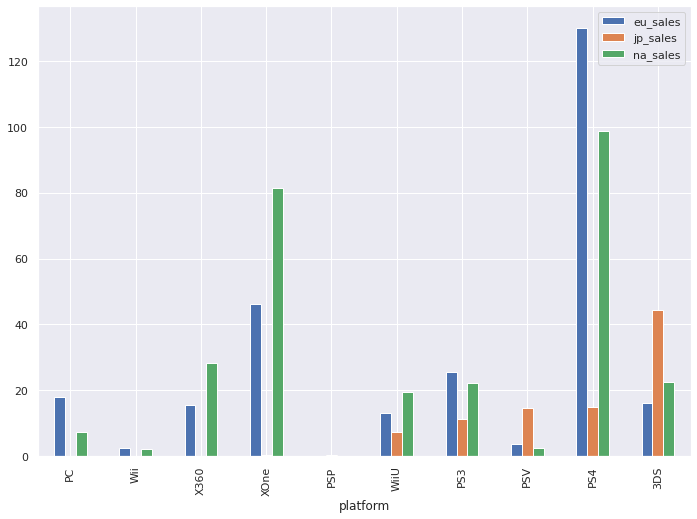

In [ ]:
df_newest.pivot_table(index = 'platform', values = ('eu_sales', 'na_sales', 'jp_sales'), aggfunc = 'sum').sort_values(by = 'jp_sales').plot(kind = 'bar');

In [ ]:
# выражение в процентах от продаж по всем платформам
df_newest.pivot_table(index = 'platform', values = ('eu_sales', 'na_sales', 'jp_sales'), aggfunc = 'sum').apply(lambda x:100 * x / float(x.sum())).round(2).sort_values(by = 'eu_sales', ascending = False)

,eu_sales,jp_sales,na_sales
platform,,,
PS4,48.04,16.13,34.71
XOne,17.09,0.34,28.61
PS3,9.44,12.05,7.76
PC,6.64,0.00,2.55
3DS,5.96,47.52,7.97
X360,5.72,0.09,9.96
WiiU,4.86,7.85,6.82
PSV,1.30,15.62,0.89
Wii,0.96,0.00,0.73


Наиболее популярные платформы:
* у европейцев PS4, XOne, PS3, PC и 3DS
* у американцев PS4, XOne, X360, 3DS и PS3
* у японцев 3DS, PS4, PSV, PS3 и WiiU

Плоечка третья и четвёртая входит в топ-5 во всех регионах. Никому не понятная в Европе и Северной Америке платформа 3DS в Японии самая популярная

## Самые популярные жанры


In [ ]:
# выражение в процентах от продаж по всем платформам
df_newest.pivot_table(index = 'genre', values = ('eu_sales', 'na_sales', 'jp_sales'), aggfunc = 'sum').apply(lambda x:100 * x / float(x.sum())).round(2).sort_values(by = 'jp_sales', ascending = False)

,eu_sales,jp_sales,na_sales
genre,,,
Role-Playing,10.41,33.47,11.78
Action,27.59,31.78,25.53
Fighting,2.47,6.84,4.38
Misc,4.75,6.03,5.30
Shooter,24.21,5.23,27.82
Adventure,2.40,3.87,1.99
Sports,16.89,3.50,16.24
Platform,2.51,2.89,2.39
Simulation,2.70,2.48,0.93


Самые популярные жанры:
* у европейцев action, shooter, sports, role-playing и racing
* у американцев shooter, action, sports, role-playing и misc
* у японцев role-playing, action, fighting, misc и shooter

Action, shooter и role-playing входит в топ-5 всех регионов. Однако, только action нравится всем практически одинаково сильно. А вот shooter японцы явно не отдают первое предпочтение, для них также гораздо важнее role-playing, чем для европейцев и американцев. Приверженность боевым искусствам японцев сказывается в наличии в топ-5 жанра fighting. Европейцам явно не хватает своих дорог, чтобы устраивать гонки на улицах, поэтому они выпускают пар в играх жанра racing, тогда как американцы устраивают дестрой на просторах своих прерий. В культуре японцев скорость не является значимым, поэтому и жанр racing находится далеко за рамками топ-5.

## Влияние рейтинга ESBR на продажи в регионах

In [ ]:
# выражение в процентах от продаж по всем платформам
df_newest.pivot_table(index = 'rating', values = ('eu_sales', 'na_sales', 'jp_sales'), aggfunc = 'sum').apply(lambda x:100 * x / float(x.sum())).round(2).sort_values(by = 'jp_sales', ascending = False)

,eu_sales,jp_sales,na_sales
rating,,,
T,15.84,42.13,17.52
E,26.15,23.24,22.10
M,45.67,22.28,45.35
E10+,12.34,12.34,15.03


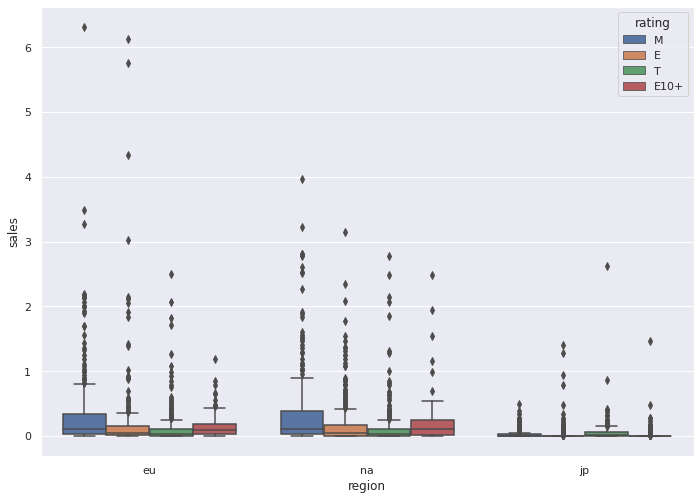

In [ ]:
# объединение данных о продажах по регионам
eu_sales_vs_rating = df_newest[['eu_sales', 'rating']]
na_sales_vs_rating = df_newest[['na_sales', 'rating']]
jp_sales_vs_rating = df_newest[['jp_sales', 'rating']]

eu_sales_vs_rating = eu_sales_vs_rating.rename(columns = {'eu_sales':'sales'})
na_sales_vs_rating = na_sales_vs_rating.rename(columns = {'na_sales':'sales'})
jp_sales_vs_rating = jp_sales_vs_rating.rename(columns = {'jp_sales':'sales'})

eu_sales_vs_rating['region'] = "eu"
na_sales_vs_rating['region'] = "na"
jp_sales_vs_rating['region'] = "jp"

frames = [eu_sales_vs_rating, na_sales_vs_rating, jp_sales_vs_rating]

sales_vs_rating = pd.concat(frames)

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(y= sales_vs_rating['sales'], x = sales_vs_rating['region'], hue = sales_vs_rating['rating']);

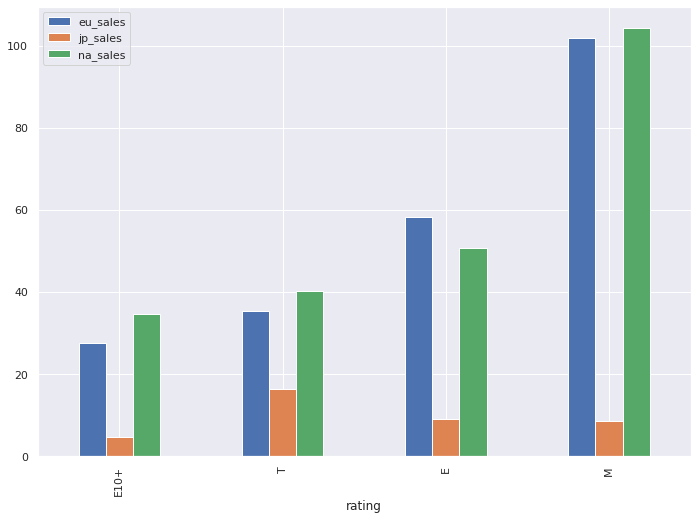

In [ ]:
df_newest.pivot_table(index = 'rating', values = ('eu_sales', 'na_sales', 'jp_sales'), aggfunc = 'sum').sort_values(by = 'eu_sales').plot(kind = 'bar');

Рейтинг влияет одинаково в Европе и Америке: наибольшие продажи имеют рейтинг M, далее по снижению продаж - E, T, E10+. В Японии всё как всегда по-своему: наибольшие продажи имеют рейтинг T, далее - E, M и E10+

Вывод: рейтинг влияет на продажи в отдельных регионах

# Проверка гипотез

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различаются

In [ ]:
sample_PC = df_newest.query('platform == "PC"')['user_score'].dropna()
sample_XOne = df_newest.query('platform == "XOne"')['user_score'].dropna()

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_PC, 
    sample_XOne)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Статистическая гипотеза о равенстве средних пользовательских оценок двух платформ не отвергается, пользователи ставят оценки играм, а не платформам и в большинстве случаев эти оценки схожи. Однако, как было выявлено при заполнении пропусков, некоторые платформы имеют заметно отличные оценки, что может быть связано с техническими особенностями переноса игр с одной платформы на другую.

Нулевая гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [ ]:
sample_Action = df_newest.query('genre == "Action"')['user_score'].dropna()
sample_Sports = df_newest.query('genre == "Sports"')['user_score'].dropna()

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_Action, 
    sample_Sports)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  2.8711147985105864e-19
Отвергаем нулевую гипотезу


Статистическая гипотеза о равенстве средних пользовательских оценок двух жанров отвергается. Это сходится с результатами - в исследовании было показано, что профиль пользователя (предпочтения по жанрам) отличается по миру

Вывод: статистические гипотезы были сформулированы исходя из обычного алгоритма формулирования статистических гипотез. Нулевая гипотеза всегда о сходстве двух выборок, альтернативная - о различии. Всё по стандарту, никакой отсебятины, потому как возможностей для творческого проявления в данном вопросе 0 (ноль). Во всяком случае, на данном уровне познания. За основу брались данные по пользовательским оценкам игр. Критический уровень статистической значимости принят 5%. Результаты проверки не заставили удивиться.

Нулевая статистическая гипотеза о равенстве средних пользовательских оценок двух платформ не отвергается, однако, вряд ли является верной исходя из результатов исследования.

Нулевая статистическая гипотеза о равенстве средних пользовательских оценок двух жанров отвергается достаточно уверенно, что подтверждается результатами исследования.

# Вывод

Для выявления определяющих успешность игры закономерностей был выбран период с 2014 по 2016 гг. Больший период брать не следует, поскольку коньюнктура рынка меняется: конкуренции среди платформ становится со временем больше, скорость смены игровых трендов также возросла: до 2007 год лидеры среди игровых платформ сменялись каждые 5 лет, а после - каждые 2-3 года. Поскольу прогноз осуществляется на 2017 г, то следует брать интервал не более чем на 3 года отстающий от прогнозного, т.е. 2014-2016 гг.

В последнее время наиболее популярными являются платформы PS4 и XOne, однако и их популярность начала спадать с 2015 г. Это означает, что скоро на рынке появится новая игровая платформа, сделав ставку на которую, можно кормиться следующие годы.

На отзывы как пользователей, так и критиков можно не ориентироваться, они на продажи не влияют.

Самые прибыльные игровые жанры - action и shooter. Причём, для максимизации прибыли в жанре shooter нужно сделать небольшое количество качественных игр, тогда как в жанре action следует сделать большое количество игр.

Рынок, на который следует ориентироваться, вибирая платформу PS4 не важен, а для игр на XOne предпочтительнее европейский или североамериканский рынок. Выбирая жанр action рынок также не важен, тогда как shooter может быть менее востребован в Японии. Рейтинг влияет на продажи по-разному в западном и восточном мире. В Европе и Северной Америке большие продажи игр с рейтингом M, а в Японии - с рейтингом T.